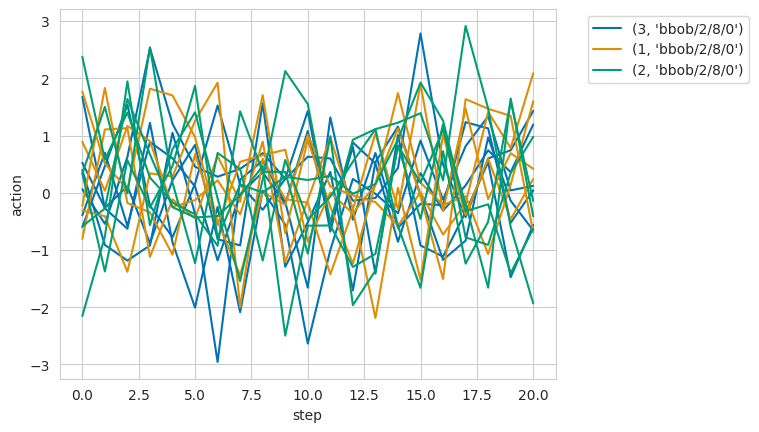

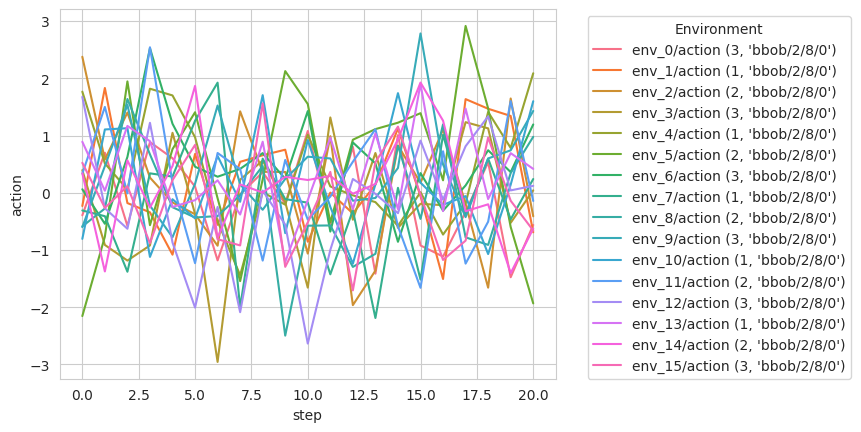

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from carps.analysis.utils import setup_seaborn

setup_seaborn()

%matplotlib inline

fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/tmpruns/PPO-RNN-norm/DACBO/dacbo_Csymlogregret_AWEI-step_Ssawei_Rsymlogregret-DefaultAction_Ibbob2d_fid8_3seeds/1/tensorboard/actions.csv"
df = pd.read_csv(fn)

# instance columns
instance_cols = [c for c in df.columns if c.endswith("/instance")]

# map: env_0 -> instance_value
env_to_instance = {
    c.split("/")[0]: df[c].iloc[0]
    for c in instance_cols
}

act_cols = [c for c in df.columns if "action" in c]
df_act = df[["step"] + act_cols]
df_long = df_act.melt(id_vars=["step"], value_name="action", var_name="env")
df_long["instance"] = df_long["env"].map(lambda x: env_to_instance.get(x.split('/')[0], 'NA'))

ax = sns.lineplot(data=df_long, x="step", y="action", hue="instance",
                  estimator=None, units="env"
)
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

ax = sns.lineplot(data=df_long, x="step", y="action", hue="env")
handles, labels = ax.get_legend_handles_labels()
new_labels = [
    f"{label} {env_to_instance.get(label.split('/')[0], 'NA')}"
    for label in labels
]
ax.legend(
    handles,
    new_labels,
    bbox_to_anchor=(1.05, 1),
    title="Environment",
)
plt.show()